<a href="https://colab.research.google.com/github/rafaelafachine/DataScience/blob/main/AnaliseFilmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
pd.read_csv("ratings.csv")

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
  # 5 primeiros dados
notas = pd.read_csv("ratings.csv") 
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
  # Irá renomear o nome das colunas

notas.columns = ["UsuarioId", "FilmeId", "Nota", "Momento"] 
notas.head()

,UsuarioId,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
  # Remover repetições
  
notas["Nota"].unique()
notas["Nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

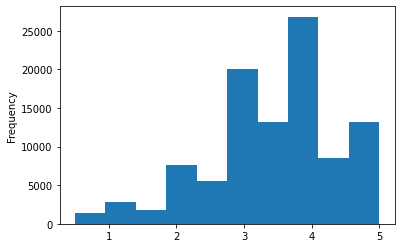

In [16]:
# Conjunto de dados - Histograma
# Analise básica: A nota 5 apareceu diversas vezes, enquanto a nota 4,5 nem tantas; sendo assim a nota que mais apareceu foi 4.

notas.Nota.plot(kind='hist')

In [17]:
#Calculo da média e mediana

print("Média",notas['Nota'].mean())
print("Mediana",notas['Nota'].median())

Média 3.501556983616962
Mediana 3.5


In [3]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.columns = ["filmesId", "Titulo", "Generos"]

In [19]:
# Comparação: utiliza ==

notas.query("FilmeId==1")

,UsuarioId,FilmeId,Nota,Momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [20]:


notas.query("FilmeId==1").Nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Nota, Length: 215, dtype: float64

# Analisando algumas notas específicas por filmes

In [22]:
# Retorna um objeto do tipo DataFrameGroupBy

notas.groupby("FilmeId")

In [23]:
notas.groupby("FilmeId").mean()

,UsuarioId,Nota,Momento
FilmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [25]:
medias_por_filmes = notas.groupby("FilmeId").mean().Nota
medias_por_filmes.head()



FilmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

Plotar dados em um gráfico

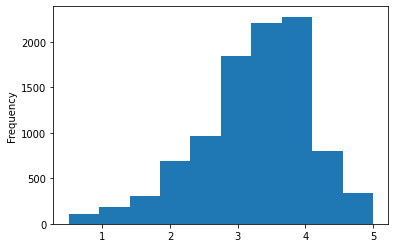

In [26]:
medias_por_filmes.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


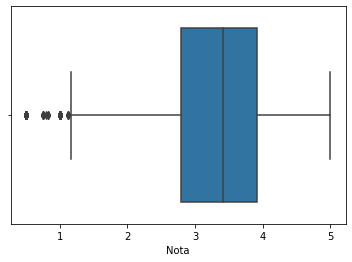

In [28]:
import seaborn as sns
sns.boxplot(medias_por_filmes)

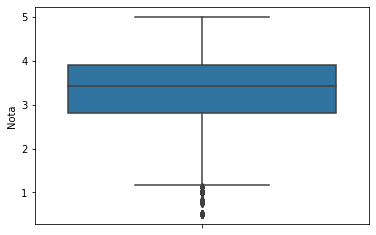

In [36]:
# Vertical

sns.boxplot(y=medias_por_filmes)

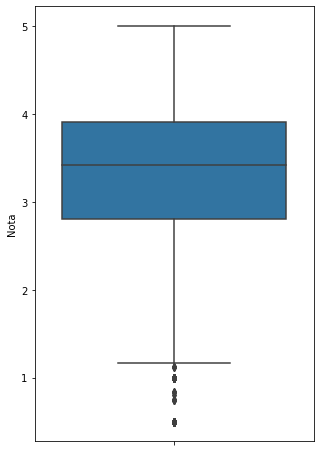

In [37]:
# Configuração tamanho da imagem

import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filmes)

In [29]:
# Medidas descritivas

medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

Gráfico de distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


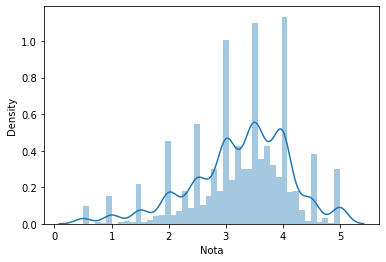

In [33]:
sns.distplot(medias_por_filmes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


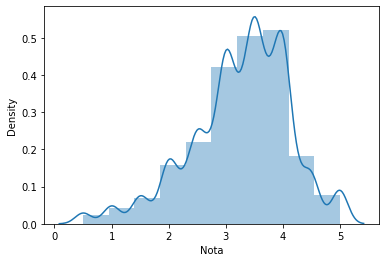

In [34]:
# O argumento bins - defini o numero de separações

sns.distplot(medias_por_filmes,bins=10)

# Colocar título no gráfico

Text(0.5, 1.0, 'Histograma das médias dos filmes')

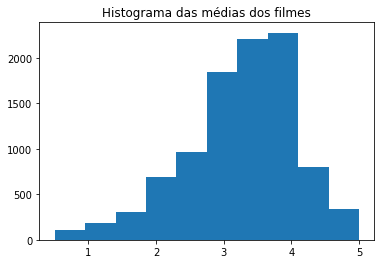

In [35]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)
plt.title("Histograma das médias dos filmes")